In [2]:
from lodnelf.train.config.config_factory import ConfigFactory

config_factory = ConfigFactory()
config = config_factory.get_by_name("DeepPluckerLegoThree")

In [3]:
dataset = config.get_train_data_set("data/lego")

In [7]:
import torch

batch = [dataset[i] for i in range(128 * 128)]
image = torch.stack(
    [color for ray_origin, ray_direction, color in batch], dim=0
)

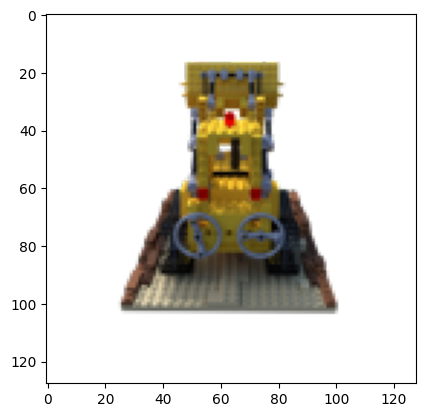

In [8]:
from matplotlib import pyplot as plt

plt.imshow(image.view(128, 128, 4).cpu().numpy())

In [9]:
state_dict = torch.load("models/lego_deep_plucker_ray_based_1/model_epoch_5.pt", map_location="cpu")

model = config.get_model()
model.load_state_dict(state_dict)

<All keys matched successfully>

In [14]:
ray_origins = torch.stack(
    [ray_origin for ray_origin, ray_direction, color in batch], dim=0
)
ray_directions = torch.stack(
    [ray_direction for ray_origin, ray_direction, color in batch], dim=0
)

col = model((ray_origins, ray_directions, image))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


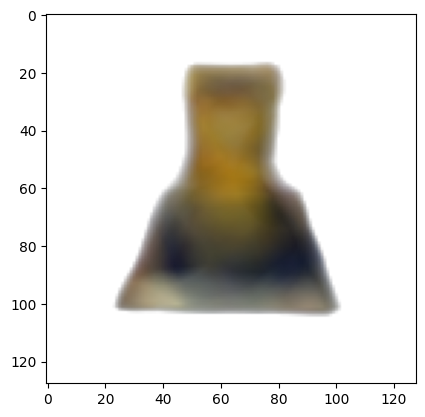

In [15]:
plt.imshow(col.view(128, 128, 4).cpu().detach().numpy())